In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=x)

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    steps_per_epoch=len(train_images) / 32,
    epochs=10,
    validation_data=(test_images / 255.0, test_labels)
)

Epoch 1/10
1562/1562 [==============================] - 51s 32ms/step - loss: 1.9507 - accuracy: 0.3014 - val_loss: 1.6147 - val_accuracy: 0.4438
Epoch 2/10
1562/1562 [==============================] - 50s 32ms/step - loss: 1.6873 - accuracy: 0.4018 - val_loss: 1.4904 - val_accuracy: 0.4842
Epoch 3/10
1562/1562 [==============================] - 50s 32ms/step - loss: 1.6003 - accuracy: 0.4362 - val_loss: 1.4216 - val_accuracy: 0.5048
Epoch 4/10
1562/1562 [==============================] - 47s 30ms/step - loss: 1.5539 - accuracy: 0.4543 - val_loss: 1.3882 - val_accuracy: 0.5168
Epoch 5/10
1562/1562 [==============================] - 47s 30ms/step - loss: 1.5173 - accuracy: 0.4668 - val_loss: 1.3624 - val_accuracy: 0.5249
Epoch 6/10
1562/1562 [==============================] - 47s 30ms/step - loss: 1.4952 - accuracy: 0.4734 - val_loss: 1.3376 - val_accuracy: 0.5361
Epoch 7/10
1562/1562 [==============================] - 46s 30ms/step - loss: 1.4751 - accuracy: 0.4812 - val_loss: 1.3198 -

In [ ]:
loss, accuracy = model.evaluate(test_images / 255.0, test_labels)
print(f'Test Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

313/313 [==============================] - 3s 9ms/step - loss: 1.2874 - accuracy: 0.5474
Test Loss: 1.2874
Accuracy: 0.5474


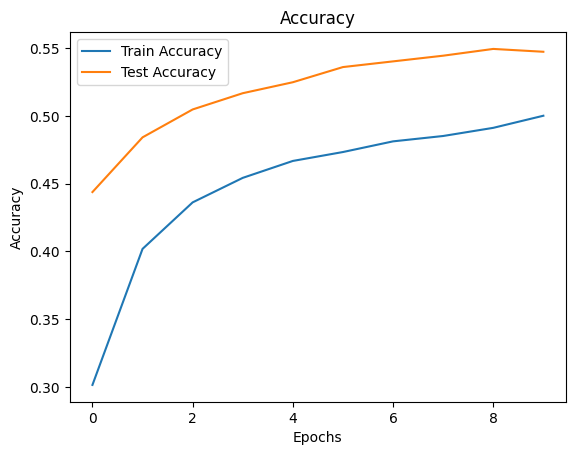

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

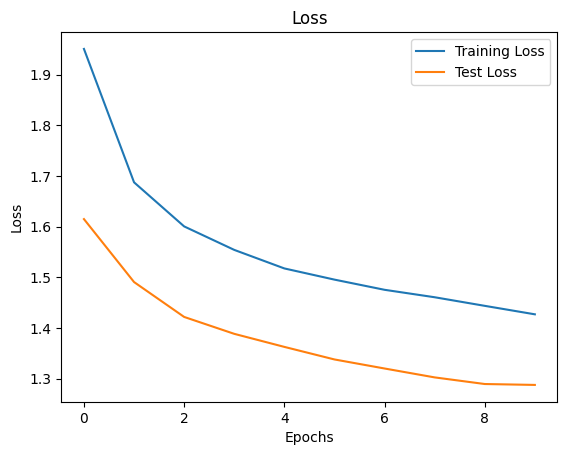

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()